Anonmyized Version to show EDA on stocks and basic analysis of tickers/portfolio
Recently remembered this is listed on my resume, but I also don't want my personal portfolio and investing strategy publicly viewable on the internet. So here's a simplified anonmyized version of  

In [11]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
yf.pdr_override()

In [12]:
# Parameters

start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2024, 1, 1)
symbols = ["GOOGL", "AAPL", "AMZN", "META", "NVDA", "AMD"]
weights = [0, 0.05, 0.05, 0.1, 0.75, 0.05]
trading_days = 252
datasets = []

# Get data
# TODO: Get market cap data
for sym in symbols:
    datasets.append(pdr.get_data_yahoo(sym, start_date, end_date))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [13]:
# Backend Functions

assert len(symbols) == len(weights), "Len of symbols and weights must match"
assert np.sum(weights) == 1, "Weights need to sum to 1"


def return_calculations(datasets, cumulative=False):
    returns = []
    for df in datasets:
        if cumulative:
            returns.append(100 * (1 + (df["Close"].pct_change().dropna())).cumprod() - 1)
        else:
            returns.append(100 * df["Close"].pct_change().dropna())
    return pd.DataFrame(returns, index=symbols).T

def port_std(simple_returns, weights, trading_days):
    cov_matrix = simple_returns.cov()
    port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    port_std = np.sqrt(port_variance) * np.sqrt(trading_days)
    return port_std


Stock Analysis
Done on the individual asset level

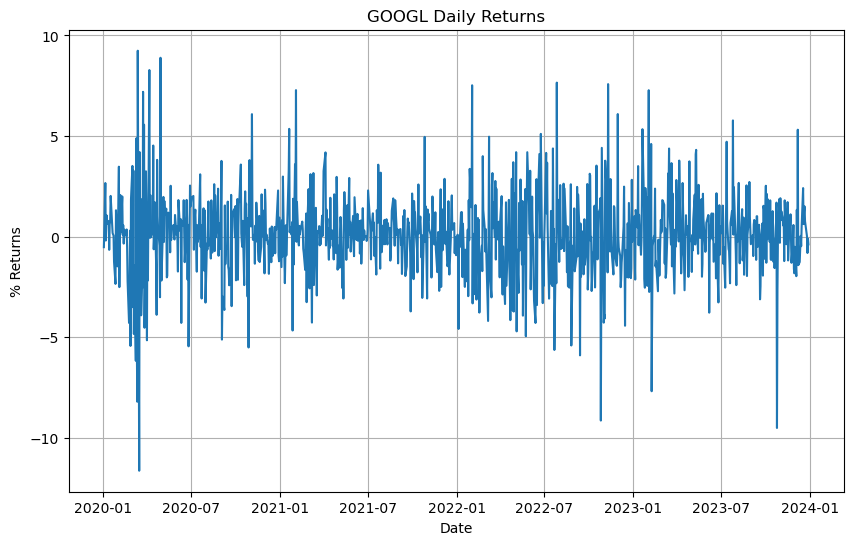

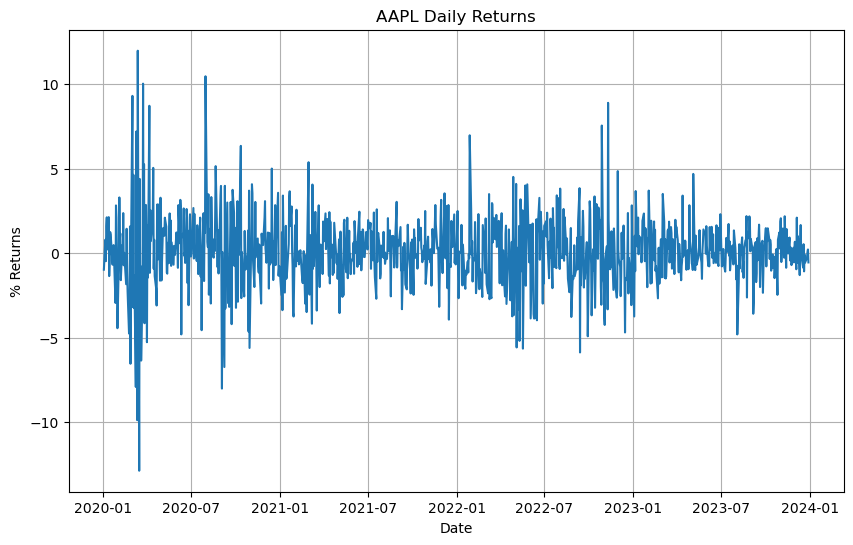

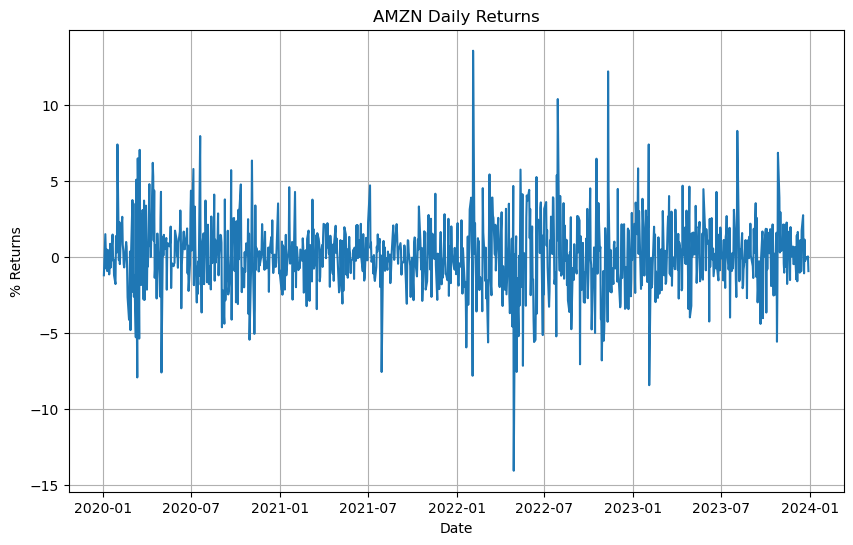

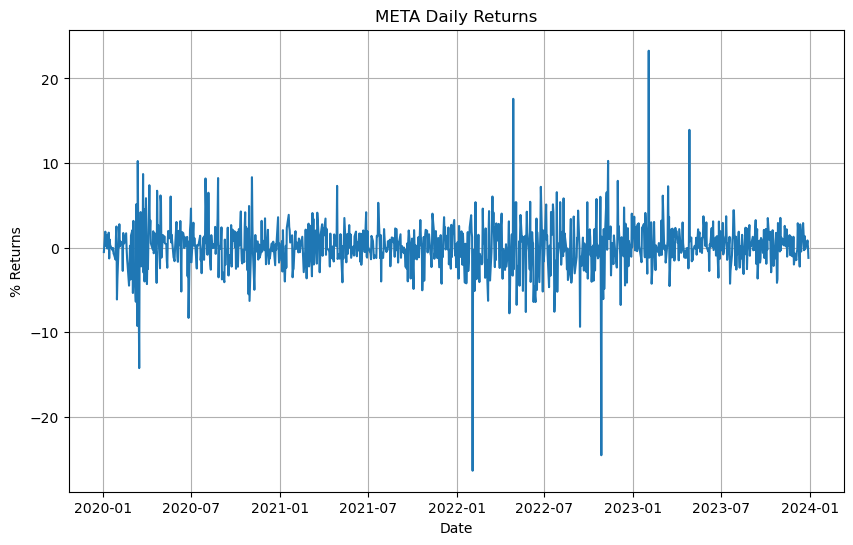

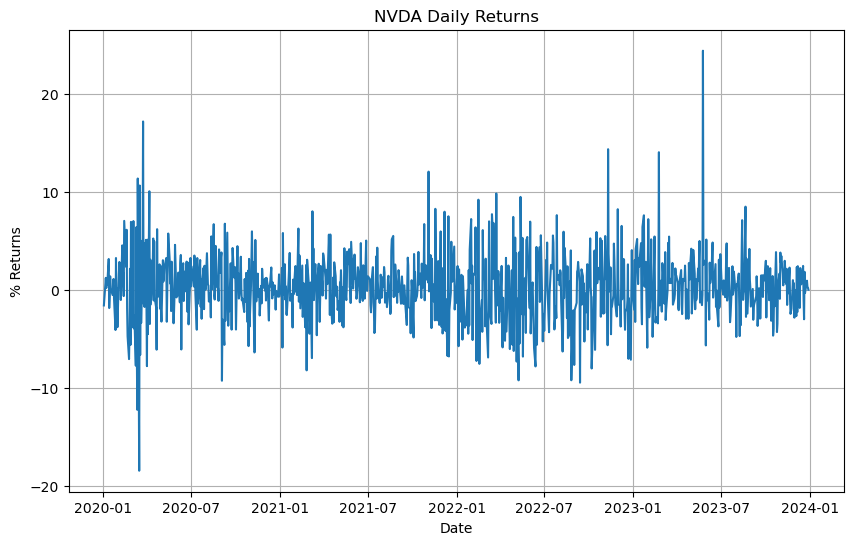

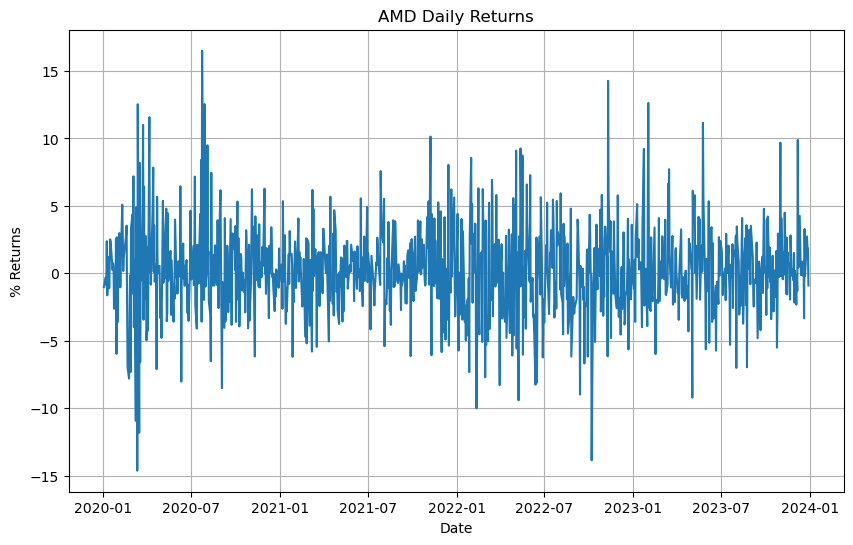

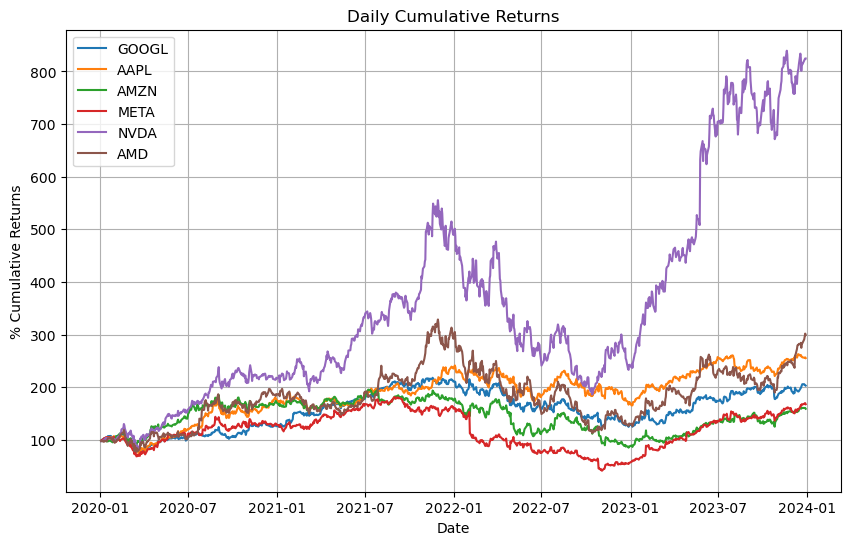

In [14]:
# Return Plots
simple_returns = return_calculations(datasets)
cum_returns = return_calculations(datasets, cumulative=True)

# Plot individual simple returns
for idx, column in enumerate(simple_returns.columns):
   plt.figure(figsize=(10, 6))
   plt.plot(simple_returns[column], label=column)
   plt.title(f"{symbols[idx]} Daily Returns")
   plt.xlabel("Date")
   plt.ylabel("% Returns")
   plt.grid()
   plt.show()

# Plot cumulative returns for comparison
plt.figure(figsize=(10, 6))
plt.plot(cum_returns, label=cum_returns.columns)
plt.title("Daily Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("% Cumulative Returns")
plt.grid()
plt.legend()

Damn I wish I bought NVDA during the pandemic

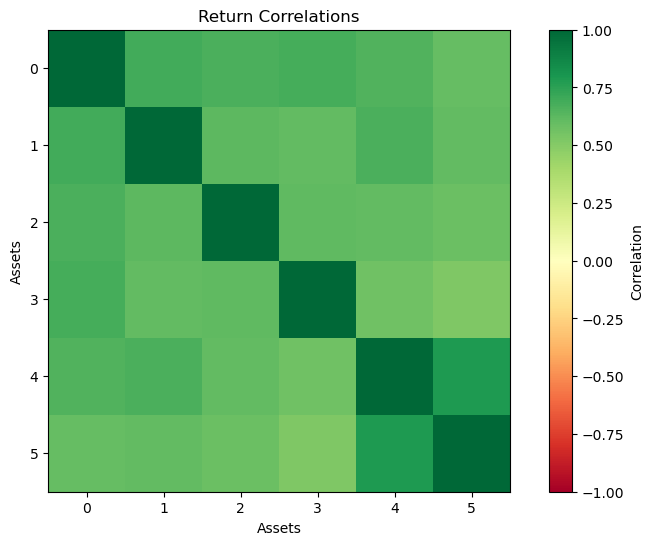

In [15]:
# Plot return correlations

corr_matrix = simple_returns.corr()
plt.figure(figsize=(10, 6))
plt.imshow(corr_matrix, vmin=-1, vmax=1, cmap='RdYlGn')
plt.colorbar(label='Correlation')
plt.title("Return Correlations")
plt.xlabel("Assets")
plt.ylabel("Assets")
plt.show()

        

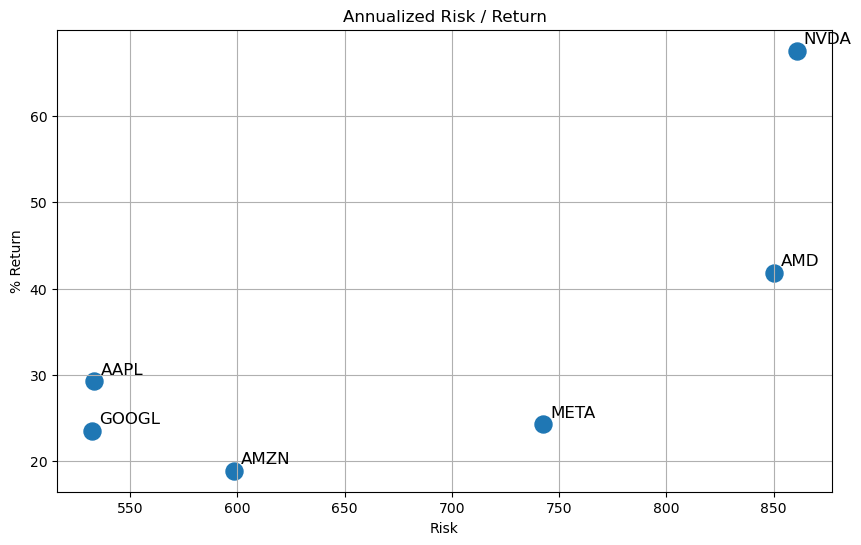

In [16]:
# Simple Risk vs Return

mean_return = simple_returns.mean() * trading_days
std_return = simple_returns.std() * trading_days

plt.figure(figsize=(10, 6))
plt.scatter(std_return, mean_return, s=150, label=symbols)
plt.title("Annualized Risk / Return")
plt.xlabel("Risk")
plt.ylabel("% Return")
plt.grid()

for label, x, y in zip(symbols, std_return, mean_return):
    plt.annotate(label, xy=(x, y), xytext=(5, 5), textcoords='offset points', fontsize=12)

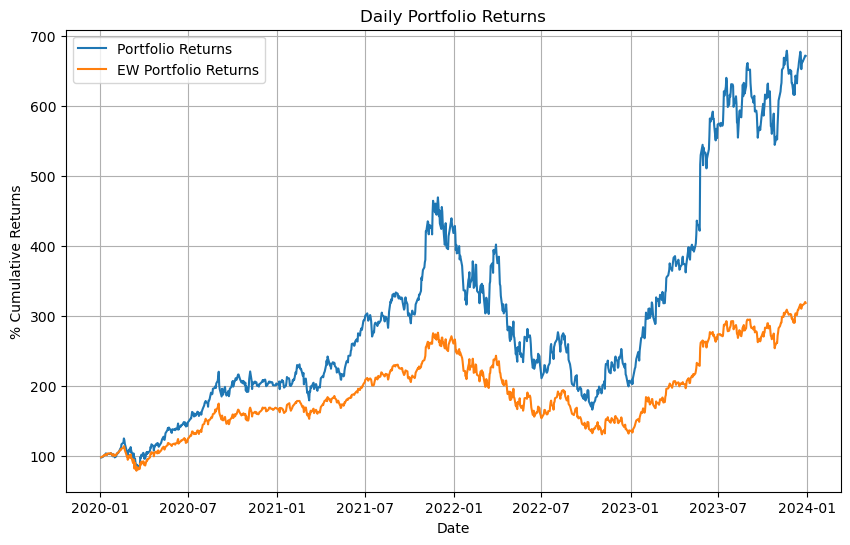

In [17]:
# Portfolio Return vs EW Portfolio Return

port_returns = (cum_returns * weights).sum(axis=1)
port_returns_ew = (cum_returns * (1/len(symbols))).sum(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(port_returns, label="Portfolio Returns")
plt.plot(port_returns_ew, label="EW Portfolio Returns")
plt.title("Daily Portfolio Returns")
plt.xlabel("Date")
plt.ylabel("% Cumulative Returns")
plt.grid()
plt.legend()
